# Sprint 3 Task 1 (S03_T01)

Author: *Alberto Achaval*

## Level 1 

### Practice 1

Graphic display with Matplotlib and Seaborn libraries.

In [1]:
# First of all we import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Now we load original dataset with Pandas read_csv function

airlines_delay = pd.read_csv('DelayedFlights.csv')
airlines_delay.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Common style parametres for all charts

fig_size = (16,4) # size of the chart
font_title = {'family' : 'Tahoma', 'color' : 'steelblue', 'size' : 20} # font title dictionary
font_axis = {'family' : 'Tahoma', 'color' : 'steelblue', 'size' : 14} # font axis dictionary


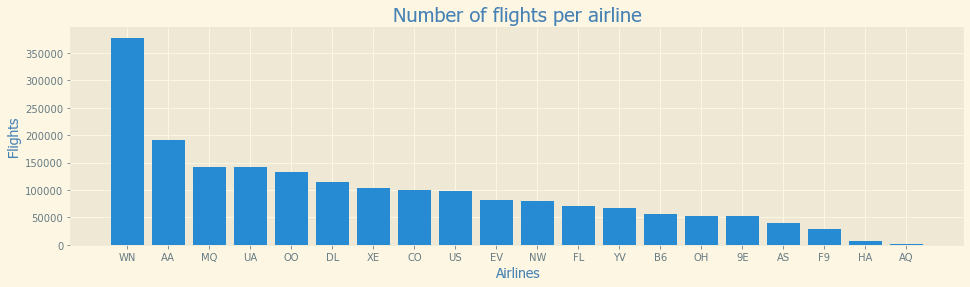

In [12]:
# Categorical varible display: UniqueCarrier Distribution

# Prepare data
df1 = airlines_delay['UniqueCarrier'].value_counts().copy() # Panda's Series

# Create plot
fig, ax = plt.subplots(figsize=fig_size) # One chart, One ax
ax.bar(df1.index, df1.values) # I use a pyplot bar display

# Style and customize plot
plt.style.use('Solarize_Light2') # Styling the chart
ax.set_title('Number of flights per airline', fontdict = font_title )
ax.set_xlabel('Airlines', fontdict = font_axis)
ax.set_ylabel('Flights', fontdict = font_axis)

# Show and save plot
plt.show()
fig.savefig('CategoricalVaribleDisplay.png', dpi = 300, bbox_inches = 'tight')


**From this chart we can see that WN airline had the majority of flights during the 2008 with over 350.000 flights.**

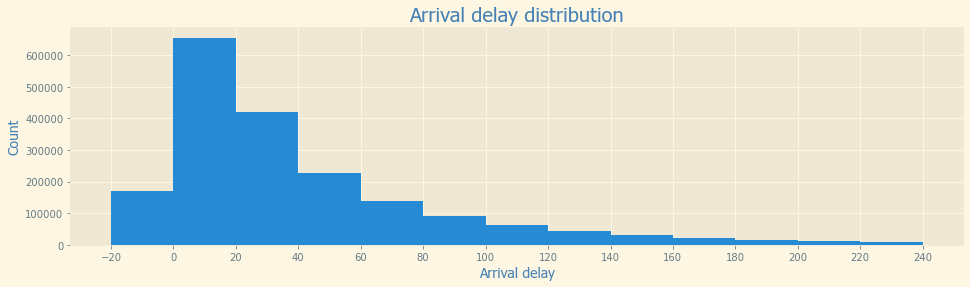

In [13]:
# Numeric variable display: ArrDelay 

# Prepare data
df2 = airlines_delay['ArrDelay'].copy() # Panda's Series
values = np.arange(-20, 260, 20).tolist() # Python list with x axis ticks values

# Create plot
fig, ax = plt.subplots(figsize = fig_size) # One chart, One ax
ax.hist(df2, bins = values) # I use a Pyplot histogram to obtain the ArrDelay distribution 2008


# Style and customize plot
plt.style.use('Solarize_Light2')
ax.set_title('Arrival delay distribution', fontdict = font_title)
ax.set_xlabel('Arrival delay', fontdict = font_axis)
ax.set_ylabel('Count', fontdict = font_axis)
ax.set_xticks(values) # Set x axis ticks values

# Show and save plot
plt.show()
fig.savefig('NumericVariableDisplay.png', dpi = 300, bbox_inches = 'tight')


**In this graph we can see that most of the delays are between 0 and 40 minutes disregarding the Carrier.**

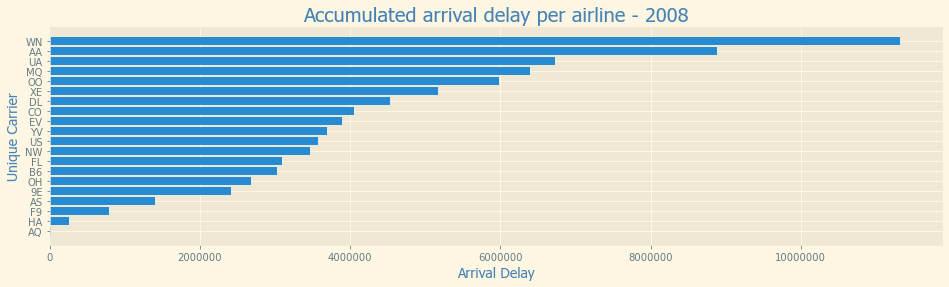

In [14]:
# Numeric and categorical variable display: UniqueCarrier and ArrDelay

# Prepare data
df3 = airlines_delay.groupby(['UniqueCarrier'])['ArrDelay'].sum().sort_values().to_dict() # Python dictionary
x3 = list(df3.keys())
y3 = list(df3.values())

# Create plot
fig, ax = plt.subplots(figsize = fig_size)
ax.barh(x3,y3) # Horizontal bars chart

# Style and customize plot
plt.style.use('Solarize_Light2')
ax.set_title('Accumulated arrival delay per airline - 2008', fontdict = font_title )
ax.set_ylabel('Unique Carrier', fontdict = font_axis)
ax.set_xlabel('Arrival Delay', fontdict = font_axis)
ax.ticklabel_format(axis='x', useOffset=False, style='plain') # I prefer the whole number instead of scientific notation

# Show and save plot
plt.show()
fig.savefig('Num_CatVarDispl.png', dpi = 300, bbox_inches = 'tight')


**WN airline had most accumulated arrival delay during 2008.**

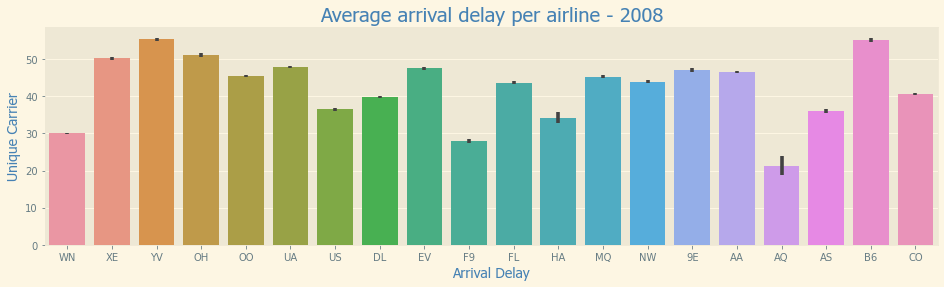

In [7]:
# Numeric and categorical variable display: Average time of the ArrDelay per UniqueCarrier

# Prepare data
df4 = airlines_delay[['UniqueCarrier', 'ArrDelay']].copy() # Panda's Series

x4 = df4['UniqueCarrier']
y4 = df4['ArrDelay']

# Create plot
fig, ax = plt.subplots(figsize = fig_size)
chart4 = sns.barplot(x = x4, y = y4, data = df4) # Seaborn bar plot

# Style and customize plot
plt.style.use('Solarize_Light2')
ax.set_title('Average arrival delay per airline - 2008', fontdict = font_title )
ax.set_ylabel('Unique Carrier', fontdict = font_axis)
ax.set_xlabel('Arrival Delay', fontdict = font_axis)

# Show and save plot
plt.show()
fig.savefig('Num_CatVarDispl2.png', dpi = 300, bbox_inches = 'tight')

**XE and B6 airlines have the longest delays on average.**

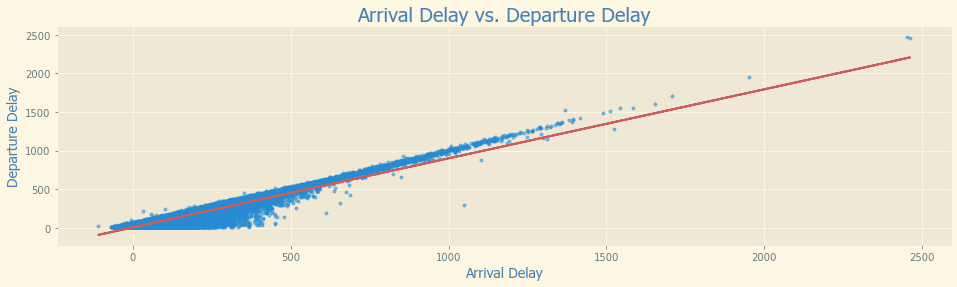

In [20]:
# Two numeric variables display: ArrDelay and DepDelay

# Prepare data
df5 = airlines_delay[['ArrDelay', 'DepDelay']].copy() 
x5 = df5['ArrDelay']
y5 = df5['DepDelay']

# Data for np.polyfit line with Nan values filled up with the mean
dfreg = airlines_delay[['ArrDelay', 'DepDelay']].fillna(df5.mean()).copy() 
xreg = dfreg['ArrDelay']
yreg = dfreg['DepDelay']

# Create plot
fig, ax = plt.subplots(figsize = fig_size) # One chart, One ax
ax.scatter(x5, y5, marker = '.', alpha=0.5) # I use a Pyplot scatter plot to chek for correlation between variables
m, b = np.polyfit(xreg, yreg, 1) # Polyfit numpy method. 1 defines the degree of the polynomial you want to fit.
ax.plot(xreg, m*xreg + b, color = 'indianred') # Pyplot Tendency line


# Style and customize plot
plt.style.use('Solarize_Light2')
ax.set_title('Arrival Delay vs. Departure Delay', fontdict = font_title )
ax.set_ylabel('Departure Delay', fontdict = font_axis)
ax.set_xlabel('Arrival Delay', fontdict = font_axis)

# Show and save plot
plt.show()
fig.savefig('2NumVarDispl.png', dpi = 300, bbox_inches = 'tight')


In [15]:
df5[['ArrDelay', 'DepDelay']].corr() # Correlation matrix

,ArrDelay,DepDelay
ArrDelay,1.000000,0.952927
DepDelay,0.952927,1.000000


**In this chart we can see that theres a strong correlation between this two variables (0,95), even more for delays longer than 500 min were dots are almost lined up.**

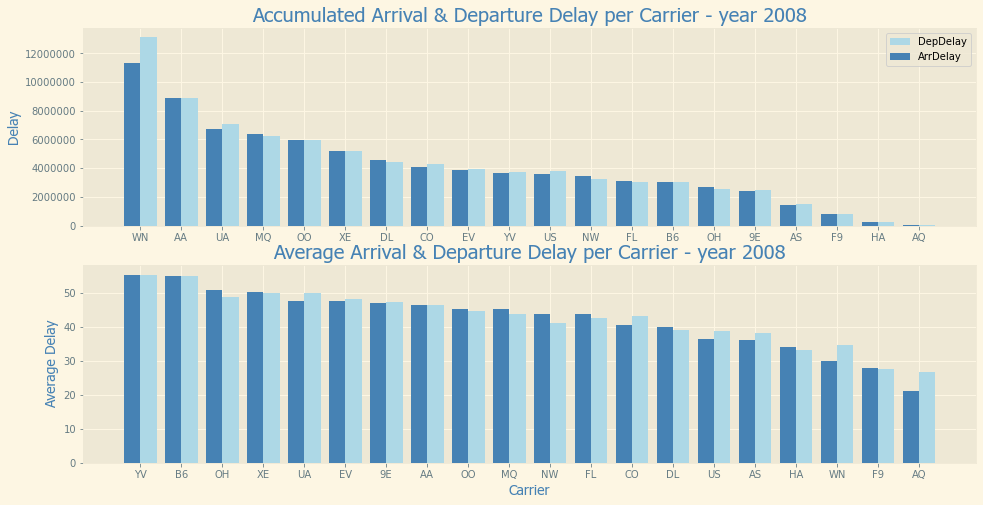

In [9]:
# Three variables, 2 numeric and 1 categorical: DepDelay , Arrdelay and UniqueCarrier

# I'm going to display 1 figure with 2 subplots

# Prepare data
# Data for axis1 with sum()
df6 = airlines_delay.groupby('UniqueCarrier')[['ArrDelay','DepDelay']].sum().sort_values(by = ['ArrDelay'], 
                                                                                         ascending = False).copy()
x6 = df6.index
y6 = df6['DepDelay']
y66 = df6['ArrDelay']

# Data for axis2 wih mean()
df7 = airlines_delay.groupby('UniqueCarrier')[['ArrDelay','DepDelay']].mean().sort_values(by = ['ArrDelay'], 
                                                                                          ascending = False).copy()
x7 = df7.index
y7 = df7['DepDelay']
y77 = df7['ArrDelay']

# Create plot
fig, (ax1, ax2) = plt.subplots(figsize = (16, 8), nrows = 2, ncols = 1) # One figure with 2 subplots

ax1.bar(x6, y6, width = 0.4, color = 'lightblue', align = 'edge', label = 'DepDelay') # Accumulated with sum(), axis1
ax1.bar(x6, y66, width = -0.4, color = 'steelblue', align = 'edge', label = 'ArrDelay')

ax2.bar(x7, y7, width = 0.4, color = 'lightblue', align = 'edge', label = 'DepDelay') # Average with mean(), axis2
ax2.bar(x7, y77, width = -0.4, color = 'steelblue', align = 'edge', label = 'ArrDelay')

# Style and customize plot
plt.style.use('Solarize_Light2')
ax1.set_title('Accumulated Arrival & Departure Delay per Carrier - year 2008', fontdict = font_title)
ax2.set_title('Average Arrival & Departure Delay per Carrier - year 2008', fontdict = font_title)
ax1.set_ylabel('Delay', fontdict = font_axis)
ax2.set_ylabel('Average Delay', fontdict = font_axis)
ax2.set_xlabel('Carrier', fontdict = font_axis)
ax1.ticklabel_format(axis='y', useOffset=False, style='plain') 
ax1.legend()


# Show and save plot
plt.show()
fig.savefig('2Num_CatVarDispl.png', dpi = 300, bbox_inches = 'tight')



**WN airline has been delayed the most during 2008 year, but YV airline has the longest delays on average.**

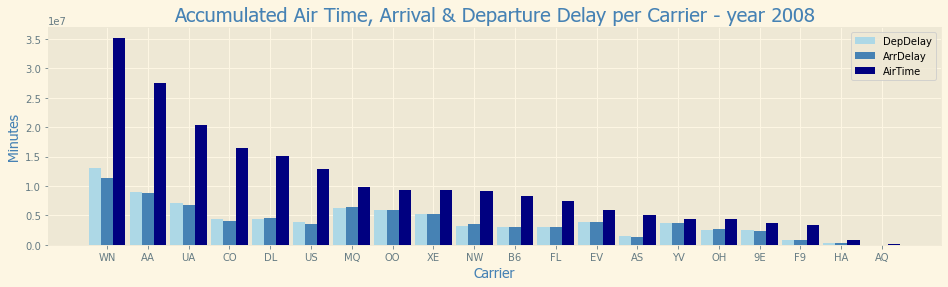

In [10]:
# More than 3 variables: DepDelay , Arrdelay, AirTime and UniqueCarrier

# Prepare data
df8 = airlines_delay.groupby('UniqueCarrier')[['ArrDelay','DepDelay', 'AirTime']].sum().sort_values(by = ['AirTime'], 
                                                                                             ascending = False).copy()
xindex = np.arange(len(df8.index)) # List of x axis ticks
                                                                                         
# Create plot
fig, ax = plt.subplots(figsize = fig_size)
ax.bar(xindex - 0.3, df8['DepDelay'], width = 0.3, color = 'lightblue', align = 'center', label = 'DepDelay')
ax.bar(xindex, df8['ArrDelay'], width = 0.3, color = 'steelblue', align = 'center', label = 'ArrDelay')
ax.bar(xindex + 0.3, df8['AirTime'], width = 0.3, color = 'navy', align = 'center', label = 'AirTime')

# Style and customize plot
plt.style.use('Solarize_Light2')
ax.set_xticks(xindex) # Ticks x axis
ax.set_xticklabels(df8.index) # Labels x axis 
ax.set_title('Accumulated Air Time, Arrival & Departure Delay per Carrier - year 2008', fontdict = font_title)
ax.set_ylabel('Minutes', fontdict = font_axis)
ax.set_xlabel('Carrier', fontdict = font_axis)
ax.legend()

# Show and save plot
plt.show()
fig.savefig('3Num_CatVarDispl.png', dpi = 300, bbox_inches = 'tight')


Let's see if there's a correlation between Air Time and Total delay, both numeric variables. A scatterplot will do the job.

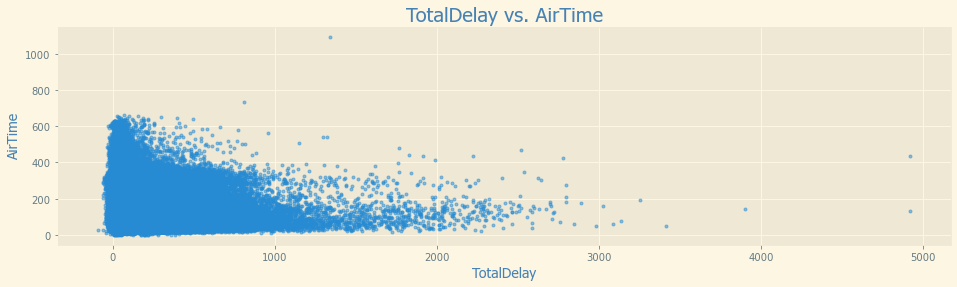

In [19]:
# Two numeric variables display: Total Delay vs Air Time

# Prepare data
airlines_delay['TotalDelay'] = airlines_delay['ArrDelay'] + airlines_delay['DepDelay'] # Pandas serie

x9 = airlines_delay['TotalDelay']
y9 = airlines_delay['AirTime']


# Create plot
fig, ax = plt.subplots(figsize = fig_size) # One chart, One ax
ax.scatter(x9, y9, marker = '.', alpha=0.5) # I use a Pyplot scatter plot to chek for correlation between variables


# # Style and customize plot
plt.style.use('Solarize_Light2')
ax.set_title('TotalDelay vs. AirTime', fontdict = font_title )
ax.set_ylabel('AirTime', fontdict = font_axis)
ax.set_xlabel('TotalDelay', fontdict = font_axis)

# Show and save plot
plt.show()
fig.savefig('2NumVarDispl2.png', dpi = 300, bbox_inches = 'tight')


In [21]:
print(airlines_delay[['TotalDelay', 'AirTime']].corr())

            TotalDelay   AirTime
TotalDelay    1.000000 -0.001447
AirTime      -0.001447  1.000000


We have almost 0. A value of 0 implies that there is no linear dependence between the variables. With this we can rule out the hypothesis that the greater the delay, the faster the pilot would fly.

### Practice 2

The displays are saved when we run the cell.

### Practice 3

I will upload task S02 T05 jupyter notebook with graphs incuded.